## Classification using Multi Layer Perceptron

In [0]:
import numpy as np
from sklearn.datasets import load_iris
import numpy as np
from sklearn.linear_model import Perceptron

In [0]:
data=load_iris()

In [0]:
x=data.data

In [0]:
y=data.target

In [0]:
model=Perceptron()

In [0]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y)

In [0]:
trainx.shape

(112, 4)

In [0]:
trainy.shape

(112,)

In [0]:
model.fit(trainx,trainy)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
predictions=model.predict(testx)

In [0]:
predictions

array([1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [0]:
testy

array([1, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1,
       2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2])

In [0]:
confusion_matrix(testy,predictions)

array([[12,  0,  0],
       [ 1, 10,  0],
       [ 0, 14,  1]])

In [0]:
!pip uninstall tensorflow -y

Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0


In [0]:
!pip install tensorflow==2.0.1

     |████████████████████████████████| 86.3MB 73kB/s 
     |████████████████████████████████| 450kB 38.5MB/s 
     |████████████████████████████████| 3.8MB 51.5MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
tf.__version__

'2.0.1'

In [0]:
keras.__version__

'2.2.4-tf'

In [0]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,ytest)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
trainx.shape

(112, 4)

In [0]:
trainy.shape

(112,)

In [0]:
x_train,x_test=x_train/255.0,x_test/255.0 #normalize

In [0]:
model=keras.Sequential([
                        keras.layers.Flatten(),
                        keras.layers.Dense(300,activation='relu'),
                        keras.layers.Dense(100,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 216us/sample - loss: 0.7516 - accuracy: 0.7560 - val_loss: 0.5370 - val_accuracy: 0.8124
Epoch 2/10
48000/48000 [==============================] - 10s 202us/sample - loss: 0.5025 - accuracy: 0.8253 - val_loss: 0.4736 - val_accuracy: 0.8313
Epoch 3/10
48000/48000 [==============================] - 9s 194us/sample - loss: 0.4539 - accuracy: 0.8410 - val_loss: 0.4460 - val_accuracy: 0.8404
Epoch 4/10
48000/48000 [==============================] - 9s 179us/sample - loss: 0.4263 - accuracy: 0.8500 - val_loss: 0.4192 - val_accuracy: 0.8556
Epoch 5/10
48000/48000 [==============================] - 9s 185us/sample - loss: 0.4057 - accuracy: 0.8576 - val_loss: 0.4158 - val_accuracy: 0.8486
Epoch 6/10
48000/48000 [==============================] - 9s 180us/sample - loss: 0.3882 - accuracy: 0.8625 - val_loss: 0.3926 - val_accuracy: 0.8605
Epoch 7/10
48000/48000 [========================

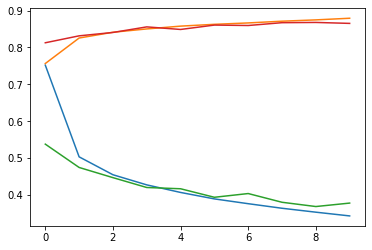

In [0]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
history=pd.DataFrame(history.history)
plt.plot(history)

In [0]:
predictions.shape

(10000, 10)

In [0]:
ytest.shape

(10000,)

In [0]:
predictions[0]

array([1.3455238e-05, 4.3907608e-07, 5.0134768e-06, 3.5143312e-05,
       1.5586840e-05, 3.0544136e-02, 2.4779027e-05, 4.8314549e-02,
       1.5674148e-03, 9.1947949e-01], dtype=float32)

In [0]:
actual_pred=np.array([np.argmax(row) for row in predictions])

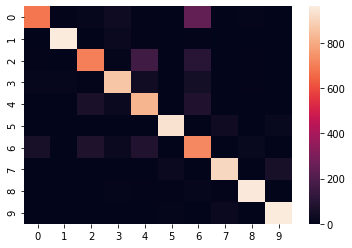

In [0]:
import seaborn as sns
sns.heatmap(confusion_matrix(ytest,actual_pred))

In [0]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  235500    
_________________________________________________________________
dense_1 (Dense)              multiple                  30100     
_________________________________________________________________
dense_2 (Dense)              multiple                  1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Regression using Multi Layer Perceptron

In [1]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [2]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 64kB/s 
     |████████████████████████████████| 3.8MB 35.1MB/s 
     |████████████████████████████████| 450kB 49.3MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
import tensorflow as tf

tf.__version__

'2.0.0'

In [9]:
data=fetch_california_housing()

In [0]:
trainx,testx,trainy,testy=train_test_split(data.data,data.target)

In [0]:
scaler=StandardScaler()
trainx=scaler.fit_transform(trainx)
testx=scaler.transform(testx)

In [13]:
trainx.shape

(15480, 8)

In [14]:
testx.shape

(5160, 8)

In [21]:
from tensorflow import keras

model=keras.Sequential([
                        keras.layers.Dense(input_shape=trainx.shape[1:],units=30,activation='relu'),
                        keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])

history=model.fit(trainx,trainy,validation_split=0.2,epochs=100)
model.evaluate(testx,testy)

Train on 12384 samples, validate on 3096 samples
Epoch 1/100
12384/12384 [==============================] - 1s 91us/sample - loss: 1.4994 - accuracy: 0.0025 - val_loss: 1.3953 - val_accuracy: 0.0045
Epoch 2/100
12384/12384 [==============================] - 1s 53us/sample - loss: 1.3592 - accuracy: 0.0025 - val_loss: 1.3734 - val_accuracy: 0.0045
Epoch 3/100
12384/12384 [==============================] - 1s 53us/sample - loss: 1.3475 - accuracy: 0.0025 - val_loss: 1.3889 - val_accuracy: 0.0045
Epoch 4/100
12384/12384 [==============================] - 1s 53us/sample - loss: 1.3439 - accuracy: 0.0025 - val_loss: 1.3652 - val_accuracy: 0.0045
Epoch 5/100
12384/12384 [==============================] - 1s 54us/sample - loss: 1.3394 - accuracy: 0.0025 - val_loss: 1.3666 - val_accuracy: 0.0045
Epoch 6/100
12384/12384 [==============================] - 1s 57us/sample - loss: 1.3396 - accuracy: 0.0025 - val_loss: 1.3722 - val_accuracy: 0.0045
Epoch 7/100
12384/12384 [==========================

[1.3671067502147467, 0.0032945736]

In [24]:
model.evaluate(testx,testy) # the first value is the loss

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.3671067502147467, 0.0032945736]

## Keras Functional API
This ia required for building neural networks that aren't sequential ex: Wide and Deep NN.

In [0]:
from tensorflow import keras

input_layer=keras.layers.Input(shape=trainx.shape[1:])
hidden_1=keras.layers.Dense(30,activation='relu')(input_layer)
hidden_2=keras.layers.Dense(30,activation='relu')(hidden_1)
concatenate_layer=keras.layers.Concatenate()([hidden_2,input_layer])
output_layer=keras.layers.Dense(1)(concatenate_layer)

model=keras.Model(inputs=[input_layer],outputs=[output_layer])

In [32]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 38)           0           dense_12[0][0]                   
                                                                 input_4[0][0]              

In [33]:
model.compile(loss='mean_squared_error',optimizer='sgd')
history=model.fit(trainx,trainy,epochs=100,validation_split=0.2)

Train on 12384 samples, validate on 3096 samples
Epoch 1/100
12384/12384 [==============================] - 1s 77us/sample - loss: 1.5070 - val_loss: 1.3653
Epoch 2/100
12384/12384 [==============================] - 1s 57us/sample - loss: 1.3537 - val_loss: 1.3568
Epoch 3/100
12384/12384 [==============================] - 1s 59us/sample - loss: 1.3424 - val_loss: 1.3573
Epoch 4/100
12384/12384 [==============================] - 1s 58us/sample - loss: 1.3421 - val_loss: 1.3767
Epoch 5/100
12384/12384 [==============================] - 1s 58us/sample - loss: 1.3383 - val_loss: 1.3507
Epoch 6/100
12384/12384 [==============================] - 1s 59us/sample - loss: 1.3389 - val_loss: 1.3669
Epoch 7/100
12384/12384 [==============================] - 1s 59us/sample - loss: 1.3362 - val_loss: 1.3524
Epoch 8/100
12384/12384 [==============================] - 1s 59us/sample - loss: 1.3360 - val_loss: 1.3849
Epoch 9/100
12384/12384 [==============================] - 1s 59us/sample - loss: 1.338

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.DataFrame(history.history)
df.tail()

,loss,val_loss
95,1.324792,1.353752
96,1.324176,1.376264
97,1.323318,1.351268
98,1.322002,1.358353
99,1.324224,1.357021


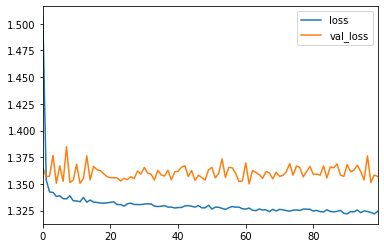

In [35]:
df.plot(kind='line')

In [36]:
model.evaluate(testx,testy)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

1.3430739763171173

In [0]:
#Multiple Input Neural Network

trainx_a,trainx_b=trainx[:,:5],trainx[:,2:]

input_layer_a=keras.layers.Input(shape=trainx_a.shape[1:],name='wide_input')
input_layer_b=keras.layers.Input(shape=trainx_b.shape[1:],name='deep_input')
hidden_1=keras.layers.Dense(30,activation='relu')(input_layer_b)
hidden_2=keras.layers.Dense(30,activation='relu')(hidden_1)
concatenate_layer=keras.layers.Concatenate()([hidden_2,input_layer_a])
output_layer=keras.layers.Dense(1)(concatenate_layer)

model=keras.Model(inputs=[input_layer_a,input_layer_b],outputs=[output_layer])

In [40]:
model.compile(loss='mse',optimizer='sgd')

history=model.fit((trainx_a,trainx_b),trainy,epochs=100,validation_split=0.2)

Train on 12384 samples, validate on 3096 samples
Epoch 1/100
12384/12384 [==============================] - 1s 99us/sample - loss: 1.4722 - val_loss: 1.3867
Epoch 2/100
12384/12384 [==============================] - 1s 56us/sample - loss: 1.3539 - val_loss: 1.3590
Epoch 3/100
12384/12384 [==============================] - 1s 59us/sample - loss: 1.3457 - val_loss: 1.3791
Epoch 4/100
12384/12384 [==============================] - 1s 55us/sample - loss: 1.3412 - val_loss: 1.3552
Epoch 5/100
12384/12384 [==============================] - 1s 54us/sample - loss: 1.3404 - val_loss: 1.3573
Epoch 6/100
12384/12384 [==============================] - 1s 56us/sample - loss: 1.3407 - val_loss: 1.3549
Epoch 7/100
12384/12384 [==============================] - 1s 54us/sample - loss: 1.3363 - val_loss: 1.3662
Epoch 8/100
12384/12384 [==============================] - 1s 53us/sample - loss: 1.3389 - val_loss: 1.3532
Epoch 9/100
12384/12384 [==============================] - 1s 56us/sample - loss: 1.338

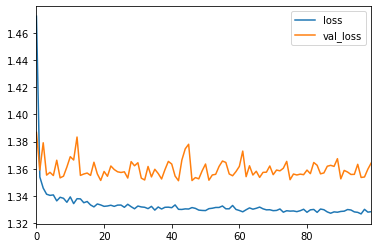

In [41]:
df=pd.DataFrame(history.history)
df.plot(kind='line')

In [50]:
# multi input, multi output, wide-deep neural network

input_layer_a=keras.layers.Input(shape=trainx_a.shape[1:],name='wide_input')
input_layer_b=keras.layers.Input(shape=trainx_b.shape[1:],name='deep_input')
hidden_1=keras.layers.Dense(30,activation='relu')(input_layer_b)
hidden_2=keras.layers.Dense(30,activation='relu')(hidden_1)
auxiliary_output=keras.layers.Dense(1,name='auxiliary_output')(hidden_2)
concatenate_layer=keras.layers.Concatenate(name='concatenate_layer')([input_layer_a,hidden_2])
output_layer=keras.layers.Dense(1,name='primary_output_layer')(concatenate_layer)

model=keras.Model(inputs=[input_layer_a,input_layer_b],outputs=[output_layer,auxiliary_output])
#model=keras.Model(inputs=[input_layer_a,input_layer_b],outputs=[output_layer])
model.compile(loss=['mse','mse'],optimizer='sgd',loss_weights=[0.9,0.1])
#model.compile(loss='mse',optimizer='sgd')
history=model.fit((trainx_a,trainx_b),(trainy,trainy),epochs=100,validation_split=0.2)
#history=model.fit((trainx_a,trainx_b),trainy,epochs=100,validation_split=0.2)

Train on 12384 samples, validate on 3096 samples
Epoch 1/100
12384/12384 [==============================] - 1s 95us/sample - loss: 1.5689 - primary_output_layer_loss: 1.4835 - auxiliary_output_loss: 2.3379 - val_loss: 1.4083 - val_primary_output_layer_loss: 1.4029 - val_auxiliary_output_loss: 1.4745
Epoch 2/100
12384/12384 [==============================] - 1s 64us/sample - loss: 1.3610 - primary_output_layer_loss: 1.3566 - auxiliary_output_loss: 1.4010 - val_loss: 1.3752 - val_primary_output_layer_loss: 1.3709 - val_auxiliary_output_loss: 1.4313
Epoch 3/100
12384/12384 [==============================] - 1s 63us/sample - loss: 1.3478 - primary_output_layer_loss: 1.3443 - auxiliary_output_loss: 1.3791 - val_loss: 1.3722 - val_primary_output_layer_loss: 1.3696 - val_auxiliary_output_loss: 1.4135
Epoch 4/100
12384/12384 [==============================] - 1s 62us/sample - loss: 1.3455 - primary_output_layer_loss: 1.3430 - auxiliary_output_loss: 1.3680 - val_loss: 1.3652 - val_primary_outpu

In [51]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 30)           930         dense_28[0][0]                   
____________________________________________________________________________________________

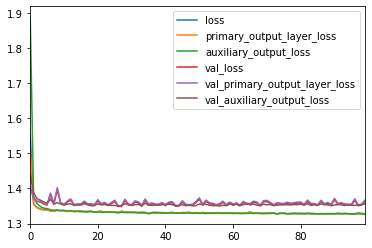

In [48]:
pd.DataFrame(history.history).plot(kind='line')

## Subclassing API
Allows models to have loops, conditional branches, varying shapes and other dynamic capabilities.

In [60]:
#no input layers in subclassing api
class WideAndDeepModel(keras.Model):
  def __init__(self):
    super().__init__()
    self.hidden_1=keras.layers.Dense(30,activation='relu')
    self.hidden_2=keras.layers.Dense(30,activation='relu')
    self.auxiliary_output=keras.layers.Dense(1)
    self.output_layer=keras.layers.Dense(1)

  def call(self,inputs):
    input_a,input_b=inputs # no input layer; raw tensors passed into function
    hidden1=self.hidden_1(input_b)
    hidden2=self.hidden_2(hidden1)
    concat=keras.layers.Concatenate()([hidden2,input_a])
    output=self.output_layer(concat)
    auxiliary_output=self.auxiliary_output(hidden2)

    return output,auxiliary_output

model=WideAndDeepModel()
model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1],optimizer='sgd')
history=model.fit((trainx_a,trainx_b),(trainy,trainy),epochs=100,validation_split=0.2)

Train on 12384 samples, validate on 3096 samples
Epoch 1/100
12384/12384 [==============================] - 2s 122us/sample - loss: 1.5416 - output_1_loss: 1.4862 - output_2_loss: 2.0396 - val_loss: 1.3936 - val_output_1_loss: 1.3873 - val_output_2_loss: 1.4720
Epoch 2/100
12384/12384 [==============================] - 1s 61us/sample - loss: 1.3539 - output_1_loss: 1.3482 - output_2_loss: 1.4057 - val_loss: 1.3786 - val_output_1_loss: 1.3745 - val_output_2_loss: 1.4369
Epoch 3/100
12384/12384 [==============================] - 1s 64us/sample - loss: 1.3430 - output_1_loss: 1.3384 - output_2_loss: 1.3849 - val_loss: 1.3721 - val_output_1_loss: 1.3691 - val_output_2_loss: 1.4197
Epoch 4/100
12384/12384 [==============================] - 1s 64us/sample - loss: 1.3421 - output_1_loss: 1.3387 - output_2_loss: 1.3728 - val_loss: 1.3733 - val_output_1_loss: 1.3719 - val_output_2_loss: 1.4076
Epoch 5/100
12384/12384 [==============================] - 1s 67us/sample - loss: 1.3406 - output_1_lo

## Saving and Restoring Models

In [0]:
# multi input, multi output, wide-deep neural network

input_layer_a=keras.layers.Input(shape=trainx_a.shape[1:],name='wide_input')
input_layer_b=keras.layers.Input(shape=trainx_b.shape[1:],name='deep_input')
hidden_1=keras.layers.Dense(30,activation='relu')(input_layer_b)
hidden_2=keras.layers.Dense(30,activation='relu')(hidden_1)
auxiliary_output=keras.layers.Dense(1,name='auxiliary_output')(hidden_2)
concatenate_layer=keras.layers.Concatenate(name='concatenate_layer')([input_layer_a,hidden_2])
output_layer=keras.layers.Dense(1,name='primary_output_layer')(concatenate_layer)

model=keras.Model(inputs=[input_layer_a,input_layer_b],outputs=[output_layer,auxiliary_output])
model.compile(loss=['mse','mse'],optimizer='sgd',loss_weights=[0.9,0.1])
history=model.fit((trainx_a,trainx_b),(trainy,trainy),epochs=100,validation_split=0.2,verbose=0)

In [0]:
model.save('functional_keras_model.h5') # only works with sequential and functional models
#for subclassed model use save_weights() and load_weights()

## Callbacks

In [0]:
# multi input, multi output, wide-deep neural network

input_layer_a=keras.layers.Input(shape=trainx_a.shape[1:],name='wide_input')
input_layer_b=keras.layers.Input(shape=trainx_b.shape[1:],name='deep_input')
hidden_1=keras.layers.Dense(30,activation='relu')(input_layer_b)
hidden_2=keras.layers.Dense(30,activation='relu')(hidden_1)
auxiliary_output=keras.layers.Dense(1,name='auxiliary_output')(hidden_2)
concatenate_layer=keras.layers.Concatenate(name='concatenate_layer')([input_layer_a,hidden_2])
output_layer=keras.layers.Dense(1,name='primary_output_layer')(concatenate_layer)


model_checkpoint_cb=keras.callbacks.ModelCheckpoint('some_model.h5',save_best_only=True)
early_stop_cb=keras.callbacks.EarlyStopping(patience=10)



model=keras.Model(inputs=[input_layer_a,input_layer_b],outputs=[output_layer,auxiliary_output])

model.compile(loss=['mse','mse'],optimizer='sgd',loss_weights=[0.9,0.1])

history=model.fit((trainx_a,trainx_b),
                  (trainy,trainy),
                  epochs=100,
                  validation_split=0.2,
                  verbose=0,
                  callbacks=[model_checkpoint_cb,early_stop_cb]) # attaching callbacks to the model training process

## Hyperparamter Optimization

In [0]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3,input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model

In [0]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [0]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
"n_hidden": [0, 1, 2, 3],
"n_neurons": np.arange(1, 100),
"learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10,cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [0]:
keras_reg.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)
